# Data exploration and linear regression in practice

In [1]:
import numpy as np
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

### The Iris dataset

In [2]:
iris2 = sns.load_dataset('iris', engine='python')

In [3]:
def covariance(X, Y):
    xhat = np.mean(X)
    yhat = np.mean(Y)
    epsilon = 0
    for x, y in zip(X, Y):
        epsilon = epsilon+(x-xhat)*(y-yhat)
    return epsilon/(len(X)-1)

In [4]:
print(covariance([1,3,4], [1,0,2]))
print(np.cov([1,3,4], [1,0,2]))

0.5
[[2.33333333 0.5       ]
 [0.5        1.        ]]


In [5]:
def correlation(X, Y):
    return(covariance(X,Y) / (np.std(X, ddof=1) * np.std(Y, ddof=1)))
    # ddof=1: to get unbiased std

In [6]:
print(correlation([1,1,4,3], [1,0,2,2]))
print(np.corrcoef([1,1,4,3], [1,0,2,2]))

0.8703882797784892
[[1.         0.87038828]
 [0.87038828 1.        ]]


### Getting an intuitive idea with Seaborn pairplot.

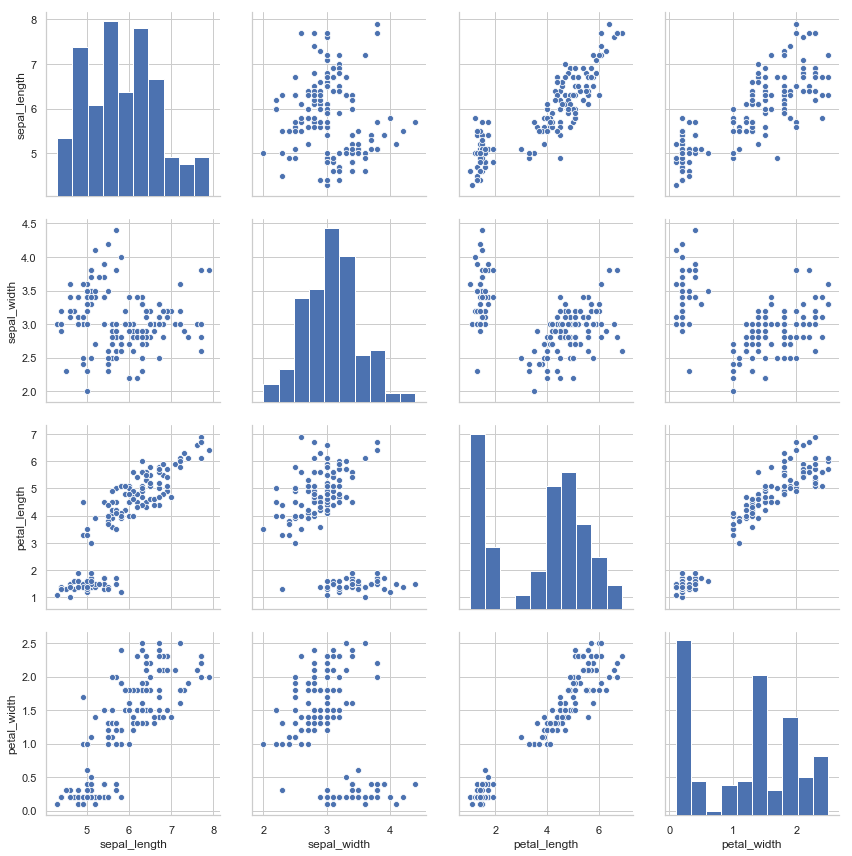

In [7]:
sns.pairplot(iris2, height=3.0)

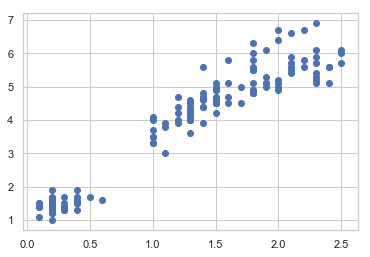

In [8]:
X = iris2['petal_width']
Y = iris2['petal_length']
plt.scatter(X, Y)

### Creating the prediction function

In [9]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

### Defining the error function

In [10]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

def sum_sq_e(alpha, beta, x, y): #L2
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

### Correlation fit

In [11]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [12]:
alpha, beta = correlation_fit(X, Y)
print(alpha)
print(beta)

1.0835580328505143
2.229940495121862


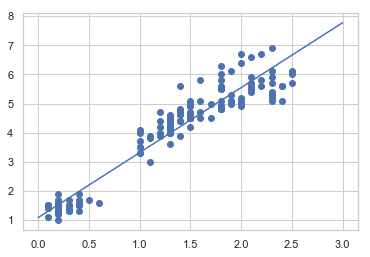

In [13]:
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*beta) + alpha)

### Polynomial regression and introduction to underfitting and overfitting

D:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.092620e-17
  overwrite_a=True).T


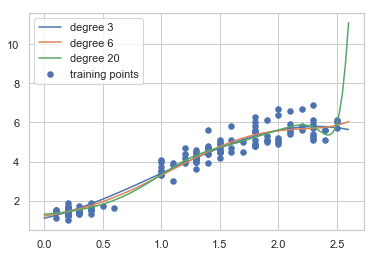

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

ix=iris2['petal_width']
iy=iris2['petal_length']

# generate points used to represent the fitted function 
x_plot = np.linspace(0, 2.6, 100)

# create matrix versions of these arrays
X = ix[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.scatter(ix, iy, s=30, marker='o', label="training points")

for count, degree in enumerate([3, 6, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='upper left')
plt.show()